#听说notebook可以写mark down
那么就在这里写点学python的日志吧

现在说来，已经学了大约有一个多月时间了。
昨天接触到pandas，一下就跑到了notebook这里。

昨天很兴奋，一下子作出一个一直想做的东西，就是一个简单的统计文本里各种词组的app。
没想到一下子就做出来了，凭着感觉。

忽然发现了python的一个特别强大的地方，就是真能随着心很快的实现出来。
我没学过其他语言，但感觉python绝对属于快的。

这对于我这种纯门外汉有很大帮助。

下面是这个程序的最初样子，倒是弄显示中文弄了半天，程序本身很快就弄好了。
还是不熟练，开始的时候连个函数都不是，最后给弄成了一个类。

In [2]:
#学习数据和绘制数据图
#做了一个简单的统计一个文本里各种词组数量的app
#后续会添加各种其他功能
#主要是为了以后研究伤寒和各种古代数据做准备

import re
import sys
import pandas as pd
import matplotlib as mpl
import  matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontManager
from pylab import mpl
import subprocess

plt.rcParams['figure.figsize'] = [18,13]#设置在网页上显示的大小

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 20,
}


#这里填写需要统计的词，写在一个组里，任意多个
shanghan1 =['桂枝汤','四逆汤','汤','桂枝','发汗','悪寒','吐','死','伤寒','热','寒','下利','小建中汤']
yuanjue1 = ['我','佛','幻','眾生','一切眾生從無始來']




class Find_word():
    def __init__(self,w_list,w_file):
        self.file = w_file
        with open(self.file) as f:
            self.data = f.readlines()
        self.list = w_list
        self.s_list = []
        

    def count(self,p):
        self.x = []
        self.a = []
        self.p = p
        self.n = 0

        for line in self.data:
                self.x = re.findall(self.p,line)
                if self.p in self.x:
                    self.a.append(self.x)

        for i in self.a:
            if self.p in i:
                for j in i:
                     if self.p in j:
                        self.n += 1
        return self.n
        

    def show(self):
        plt.xlabel('目标词汇词')
        plt.title('数据分析')
        plt.xticks(fontsize=20)#x轴的字体大小

        for i in self.list:
            self.s_list.append(self.count(i))
            plt.text(i,self.count(i)+3,self.count(i),font2)

        plt.bar(self.list,self.s_list)
        plt.show()

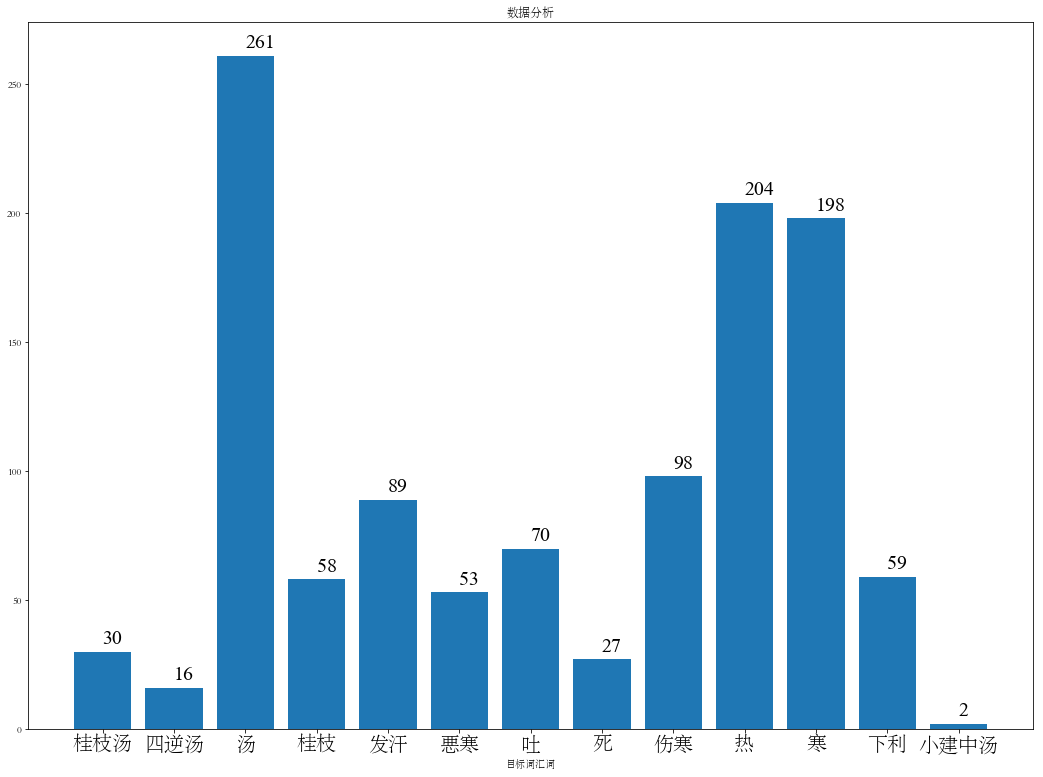

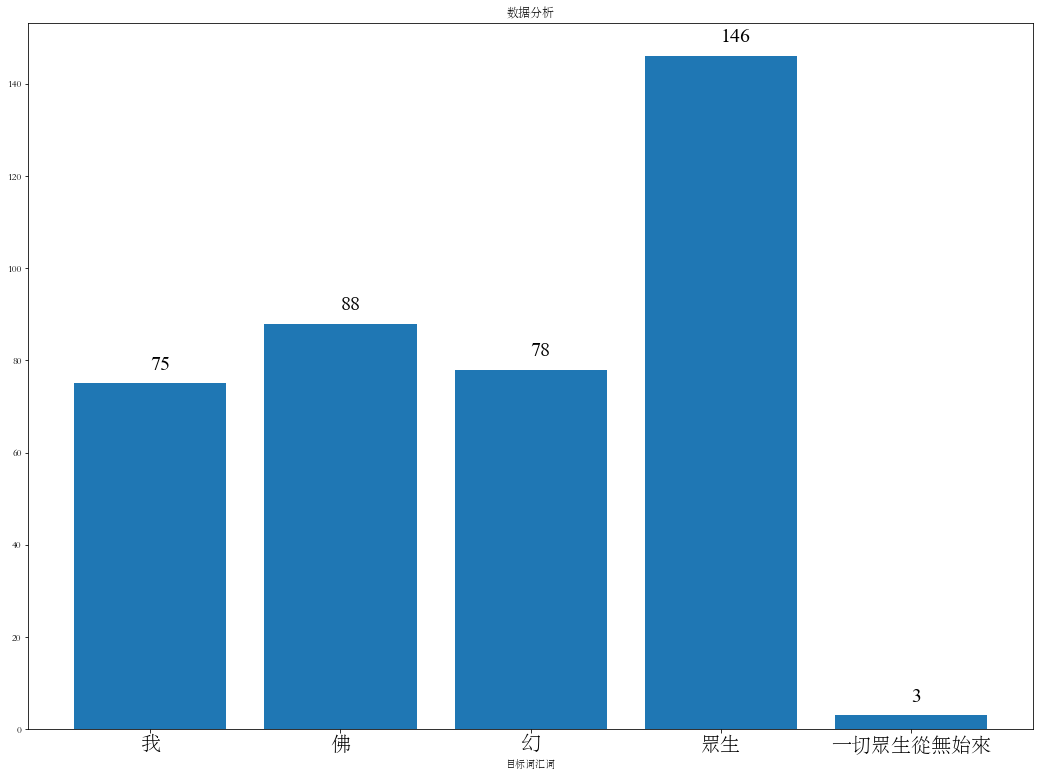

In [21]:
#填写需要统计的文档
pp = Find_word(shanghan1,'shanghan.txt')
pp1 = Find_word(yuanjue1,'yuanjue.txt')


pp.show()
pp1.show()

现在倒是习惯写类了，但不知道这玩意在程序届是如何被看待的。
要做到特别精准的文本分析，还是要人手工整理好一个文本，比如伤寒论，光查“桂枝汤”是不能精准统计出桂枝汤在伤寒论出现的次数的，因为张仲景写的时候，经常带到桂枝汤这个词，但并不是这里真的用到了桂枝汤。

还有很多类似的地方，如果要超级精准，就要手工准备材料。
但如果只是看一个方向，那没有任何问题。

接下来的打算是，先回到游戏那里把合成系统用pandas给做出来。
然后换换脑子的时候回来手工整理各种伤寒论的材料。

非常好奇一个数据化的伤寒论是啥样的。
利用西方的科技窥视张仲景大大的心法，实在是有趣。

随后很想弄一下djongo，看一下python做web啥感觉。
把上面这个程序做成一个web app，自己以后也方便用。

# 2018.11.10
应该是过了两天
这两天的收获特别大,现在是决心用整个伤寒论来做程序的练手,同时争取把伤寒的心法也拿到手,因为也必须有这个

主要就是接触了json,之前用csv的局限太大,因为伤寒的数据结构非常复杂,查了半天就是json合适
架构了第一版json数据结构,填进去一些伤寒的数据,实验一下子,而且学了一些高级的pandas的用法

今天初步做出了一个核心功能,就是根据证来下药.
是这样实现的

In [3]:
sh1 = pd.read_json('SH_ty1.json')

In [10]:
class Shanghan():
    def __init__(self):
        pass
        
        
    def bianzheng(self,zheng):#根据证输出对应方剂(简单根据伤寒的对应,而非根据心法)
        self.zheng = zheng
        n = 0
        flag = False
        for x in range(sh1.shape[1]):#一共有多少方剂,所有循环一遍
            a = pd.Series(sh1.iloc[3]['桂枝汤':][x]['体证'])#从桂枝汤(第一个)往下的所有症状给做成一个series,方便用其功能
            if a.isin(self.zheng).sum() > 1:
                print(sh1.columns[x])
            #elif a.isin(self.zheng).sum() == 1:#如果大于1,那么就是对上证
                #print(sh1.columns[x])#显示是哪个经方
                
    def find(self,find):#简单查询某一个方剂的信息
        self.find = find
        print(sh1[self.find])
        
    def count_all(self):#可以查询每个方剂或药物在整个伤寒里的统计
        pass
    
    def draw_dir(self):#画每一个方剂的方向图
        pass

In [11]:
b1 = Shanghan()

In [12]:
b1.bianzheng(['肌肉酸痛','怕风'])

桂枝加葛根汤


In [13]:
b1.bianzheng(['干呕','头痛'])

桂枝汤


In [14]:
b1.bianzheng(['怕风','小便难'])

桂枝加附子汤


今天的一个想法,也算是往后一个比较系统的想法
第一,探讨伤寒论是不是有当时当地的时效性,也就是,如果张仲景活人来到了现代,让他再写一个伤寒论(当然名字可能都不会是伤寒了),他是否会根据现代的情况而新写一个著作
我个人觉得是非常有可能的,地域,时间,不同时代人的生活方式,都会有影响
比如现代致死的最大疾病已经不是伤寒了,而且一些慢性病,那么张仲景也会根据现代人的情况而出他的书

第二, 希望通过药物方向以及对应的病人疾病方向得出核心算法,然后不让程序读任何伤寒论的数据,只是根据核心算法,面对同一个病人,看这个纯用算法的程序给出的药是否和张仲景的一致.如果真的可以做到一致,那么基本可以说是拿到了张仲景的致病心法

第三,通过程序数据分析,以及自己体悟如果拿到伤寒论的核心算法(张仲景看病开药心法),那么如果再通过机器学习(掌握现代病人数据),让机器通过海量学习+张仲景核心算法,那么理论上这个机器可以自己给出一个伤寒的现代版,就好比是张仲景穿越回来写书一样.

如果这三个问题都解决了,是否意味着,这个程序真的可以代表张仲景给现代人看病呢?

根本无需任何昂贵仪器,就用古法看诊,也就是问证,患者只需要填写自己的证,那么经过计算,就会给出准确结果(开药).

这想法是不是太胡扯了?

不知道,先一点一点实践出来,看看结果再说.

还有一个想法.

关于获取伤寒论数据的意义.

至少要获得两组数据,并且重组,用其画出所谓方向图.

第一,经方药物配伍数据,给出药物配伍的方向图

第二,患者证的数据,绘制出证的方向图

这两个方向胡应该是有一个非常对应的关系,从中找到其关系,摸出算法,就是一个破解伤寒论的核心问题.

这个基本上是一个老祖宗设计的最好的游戏核心玩法了,没有比这个更好玩的了.

